# Acne Detection

## Install YOLO11 via Ultralytics

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.0/112.6 GB disk)


In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
import os

# Lihat isi folder saat ini
print(os.listdir())

# Cek apakah file yaml ada
print(os.path.exists('/content/drive/MyDrive/AIOT/acne-dataset/data.yaml'))

['.config', 'drive', 'runs']
True


In [ ]:
from ultralytics import YOLO
import time

# Load YOLOv8 model (bisa ganti ke yolov8s.yaml atau lainnya)
model = YOLO('yolov8s.yaml')  # n = nano, ringan untuk awal

start = time.time()

# Train model
model.train(
    data='/content/drive/MyDrive/AIOT/acne-dataset/data.yaml',
    epochs=100,                # bisa 50 kalau waktu terbatas
    imgsz=640,                 # gambar lebih besar = deteksi lebih detail
    batch=16,                  # aman untuk GPU Colab free
    name='acne_yolov8s',
)

end = time.time()
print(f"Total training time: {(end - start) / 60:.2f} minutes")

!cp /content/runs/detect/acne_yolov8s/weights/best.pt /content/drive/MyDrive/AIOT/
print("Model berhasil disalin ke Google Drive!")

Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/AIOT/acne-dataset/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=acne_yolov8s2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0

100%|██████████| 755k/755k [00:00<00:00, 24.0MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

YOLOv8s summary: 129 layers, 11,135,987 parameters, 11,135,971 gradients, 28.6 GFLOPs

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 97.3MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.6±0.3 ms, read: 0.1±0.0 MB/s, size: 39.3 KB)


train: Scanning /content/drive/MyDrive/AIOT/acne-dataset/train/labels... 823 images, 12 backgrounds, 0 corrupt: 100%|██████████| 823/823 [06:14<00:00,  2.20it/s]


train: New cache created: /content/drive/MyDrive/AIOT/acne-dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 0.1±0.1 MB/s, size: 39.1 KB)


val: Scanning /content/drive/MyDrive/AIOT/acne-dataset/valid/labels... 56 images, 0 backgrounds, 0 corrupt: 100%|██████████| 56/56 [00:42<00:00,  1.32it/s]

val: New cache created: /content/drive/MyDrive/AIOT/acne-dataset/valid/labels.cache


Plotting labels to runs/detect/acne_yolov8s2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/acne_yolov8s2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.38G      4.995      3.593      3.963        115        640: 100%|██████████| 52/52 [00:20<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]

                   all         56        643   0.000179    0.00467   9.14e-05   4.85e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      5.18G      3.201      2.362        2.7         74        640: 100%|██████████| 52/52 [00:18<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         56        643      0.151      0.219     0.0925     0.0282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.18G      2.803      2.044      2.142        101        640: 100%|██████████| 52/52 [00:17<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         56        643      0.287      0.384      0.217     0.0712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      5.18G      2.595      1.882      1.929        116        640: 100%|██████████| 52/52 [00:17<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         56        643      0.402      0.426      0.375      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      5.21G      2.528      1.849      1.839        162        640: 100%|██████████| 52/52 [00:17<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all         56        643      0.292      0.423      0.226     0.0682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.21G      2.438      1.788      1.751        134        640: 100%|██████████| 52/52 [00:17<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         56        643      0.378      0.423      0.354      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.21G      2.357      1.741      1.684        189        640: 100%|██████████| 52/52 [00:17<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         56        643      0.482      0.467      0.454      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.25G      2.327      1.745      1.684        191        640: 100%|██████████| 52/52 [00:17<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all         56        643      0.438      0.445      0.376       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.29G      2.276      1.672      1.602         74        640: 100%|██████████| 52/52 [00:17<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         56        643      0.406      0.479       0.41      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      5.29G      2.229      1.689      1.605        139        640: 100%|██████████| 52/52 [00:17<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         56        643      0.402      0.428      0.383      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.29G      2.192      1.642      1.566        176        640: 100%|██████████| 52/52 [00:16<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         56        643      0.453      0.442      0.432      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.32G      2.176      1.656       1.56        163        640: 100%|██████████| 52/52 [00:17<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         56        643        0.5       0.46      0.458       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.36G      2.173      1.662      1.538         84        640: 100%|██████████| 52/52 [00:17<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         56        643      0.486      0.476      0.458      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.36G      2.131      1.627      1.521        102        640: 100%|██████████| 52/52 [00:17<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         56        643      0.456      0.443      0.419      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.36G      2.128      1.652      1.516        100        640: 100%|██████████| 52/52 [00:17<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         56        643      0.473      0.476      0.457      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       5.4G      2.127      1.646      1.502        115        640: 100%|██████████| 52/52 [00:17<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         56        643       0.45      0.467      0.423      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       5.4G      2.104      1.614      1.491        129        640: 100%|██████████| 52/52 [00:17<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         56        643      0.421      0.455      0.416      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       5.4G      2.079       1.59      1.476        108        640: 100%|██████████| 52/52 [00:18<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         56        643      0.499      0.471      0.477      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       5.4G      2.092      1.598       1.49         74        640: 100%|██████████| 52/52 [00:16<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         56        643       0.55      0.524      0.519      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       5.4G      2.063      1.575       1.45        165        640: 100%|██████████| 52/52 [00:17<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         56        643       0.54      0.476      0.493      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       5.4G      2.058      1.561      1.456        113        640: 100%|██████████| 52/52 [00:17<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         56        643      0.511      0.498      0.487      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       5.4G      2.046      1.549      1.443        117        640: 100%|██████████| 52/52 [00:16<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         56        643      0.482      0.453      0.422      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       5.4G      2.059       1.57      1.445         74        640: 100%|██████████| 52/52 [00:17<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         56        643      0.502      0.538      0.494       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       5.4G      2.056      1.558      1.437         99        640: 100%|██████████| 52/52 [00:17<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all         56        643       0.42      0.443      0.394       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       5.4G      2.016      1.577      1.435         89        640: 100%|██████████| 52/52 [00:17<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         56        643      0.526      0.471      0.488      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       5.4G      2.036      1.522       1.41         76        640: 100%|██████████| 52/52 [00:16<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         56        643      0.562      0.532      0.546      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       5.4G      2.022      1.531      1.417        187        640: 100%|██████████| 52/52 [00:17<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         56        643       0.54      0.537      0.541      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       5.4G      2.003      1.534      1.419        134        640: 100%|██████████| 52/52 [00:17<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         56        643      0.406       0.49      0.411      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       5.4G      2.004      1.502      1.398        113        640: 100%|██████████| 52/52 [00:17<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         56        643      0.518      0.551      0.523      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       5.4G      2.009       1.51      1.414         95        640: 100%|██████████| 52/52 [00:17<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]

                   all         56        643      0.541      0.532      0.536      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       5.4G      1.982      1.482      1.389        133        640: 100%|██████████| 52/52 [00:17<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         56        643      0.579      0.547      0.591       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       5.4G      1.987      1.499      1.407        172        640: 100%|██████████| 52/52 [00:17<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         56        643       0.42      0.409      0.387      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       5.4G      1.982      1.516      1.408         77        640: 100%|██████████| 52/52 [00:18<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         56        643      0.576      0.542      0.566      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       5.4G      1.979      1.514      1.397        121        640: 100%|██████████| 52/52 [00:17<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         56        643      0.566       0.56      0.568      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       5.4G      1.972       1.49      1.388        152        640: 100%|██████████| 52/52 [00:16<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         56        643      0.587      0.523       0.55      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       5.4G      1.967      1.475      1.379         87        640: 100%|██████████| 52/52 [00:17<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         56        643      0.506      0.529      0.502      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       5.4G      1.945      1.482        1.4        130        640: 100%|██████████| 52/52 [00:17<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         56        643       0.53      0.533      0.523      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       5.4G      1.958      1.468      1.371         54        640: 100%|██████████| 52/52 [00:17<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         56        643      0.598      0.505      0.567      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.72G      1.956      1.467      1.378         51        640: 100%|██████████| 52/52 [00:17<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         56        643      0.557      0.519      0.533      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.72G      1.967      1.468      1.385        144        640: 100%|██████████| 52/52 [00:16<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         56        643       0.58      0.498      0.526      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.72G      1.958      1.474      1.389        181        640: 100%|██████████| 52/52 [00:17<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         56        643      0.596      0.579      0.605       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.72G      1.935      1.456      1.369         46        640: 100%|██████████| 52/52 [00:17<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         56        643      0.582      0.529      0.559       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.72G      1.938      1.441      1.373        124        640: 100%|██████████| 52/52 [00:16<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         56        643      0.617      0.534      0.567      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.72G      1.921      1.439      1.357        181        640: 100%|██████████| 52/52 [00:16<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         56        643      0.558      0.538       0.55      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.72G       1.92      1.452       1.37        197        640: 100%|██████████| 52/52 [00:17<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         56        643      0.576      0.524      0.551      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.72G       1.93      1.461      1.354        103        640: 100%|██████████| 52/52 [00:17<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         56        643      0.593      0.529      0.586      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.72G      1.939      1.447      1.354        131        640: 100%|██████████| 52/52 [00:17<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         56        643      0.536       0.54      0.527      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.72G      1.907      1.425       1.36         69        640: 100%|██████████| 52/52 [00:17<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         56        643      0.555       0.49      0.517      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.72G      1.908      1.416      1.365        154        640: 100%|██████████| 52/52 [00:17<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         56        643      0.628      0.529      0.582      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.72G      1.916      1.441      1.347         66        640: 100%|██████████| 52/52 [00:17<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         56        643      0.495      0.529      0.483      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.72G      1.906      1.431      1.353         83        640: 100%|██████████| 52/52 [00:17<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         56        643      0.546      0.466      0.488      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      5.72G        1.9      1.434      1.356        198        640: 100%|██████████| 52/52 [00:17<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         56        643      0.603      0.525      0.562      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.72G      1.902      1.391      1.348        186        640: 100%|██████████| 52/52 [00:16<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         56        643      0.581      0.582      0.591      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.72G       1.88      1.376      1.337        123        640: 100%|██████████| 52/52 [00:17<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         56        643      0.568      0.541      0.563      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.72G      1.884      1.381      1.358        156        640: 100%|██████████| 52/52 [00:17<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         56        643      0.615      0.499      0.564      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.72G       1.87      1.381      1.333         66        640: 100%|██████████| 52/52 [00:17<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         56        643      0.545      0.599      0.594      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.72G      1.867      1.384      1.339        128        640: 100%|██████████| 52/52 [00:18<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         56        643      0.592      0.566      0.607      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.72G      1.882      1.371      1.334        100        640: 100%|██████████| 52/52 [00:18<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         56        643      0.592      0.575      0.593       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.72G      1.873      1.385      1.324        135        640: 100%|██████████| 52/52 [00:18<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all         56        643      0.562      0.551      0.564      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.72G      1.883      1.373       1.33        100        640: 100%|██████████| 52/52 [00:18<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         56        643      0.613      0.541      0.589      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.72G      1.859      1.359      1.321        126        640: 100%|██████████| 52/52 [00:17<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         56        643       0.56      0.528      0.566      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      5.72G       1.85       1.35      1.311        136        640: 100%|██████████| 52/52 [00:17<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         56        643      0.612      0.543      0.592      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      5.72G      1.868      1.376      1.338        131        640: 100%|██████████| 52/52 [00:17<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         56        643      0.526      0.485      0.507      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.72G      1.848      1.372      1.341         84        640: 100%|██████████| 52/52 [00:17<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         56        643      0.581      0.616      0.605       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.72G      1.848      1.351      1.324        121        640: 100%|██████████| 52/52 [00:18<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all         56        643      0.601      0.557      0.587      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.72G      1.842      1.349      1.328        150        640: 100%|██████████| 52/52 [00:16<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all         56        643      0.579      0.557      0.578      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.72G      1.828      1.346      1.303        162        640: 100%|██████████| 52/52 [00:17<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         56        643      0.594      0.549      0.584      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      5.72G      1.819      1.336      1.307         72        640: 100%|██████████| 52/52 [00:17<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         56        643      0.597      0.578        0.6      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      5.72G      1.848      1.332      1.316        102        640: 100%|██████████| 52/52 [00:17<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         56        643      0.607      0.536      0.583      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      5.72G       1.82       1.29      1.298        112        640: 100%|██████████| 52/52 [00:17<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         56        643      0.604      0.544      0.579       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      5.72G      1.819      1.311      1.305        133        640: 100%|██████████| 52/52 [00:18<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         56        643      0.624      0.565      0.599      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      5.72G      1.818      1.307      1.299        125        640: 100%|██████████| 52/52 [00:16<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         56        643      0.635      0.529      0.585      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.72G       1.82      1.318      1.309         66        640: 100%|██████████| 52/52 [00:17<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         56        643      0.607      0.588      0.593      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      5.72G      1.806      1.308      1.298        172        640: 100%|██████████| 52/52 [00:18<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         56        643      0.609      0.574      0.596       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.72G      1.809      1.312      1.304         83        640: 100%|██████████| 52/52 [00:17<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         56        643      0.554      0.574      0.564      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.72G      1.807      1.326       1.31         80        640: 100%|██████████| 52/52 [00:17<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         56        643      0.636      0.557      0.589      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      5.72G       1.79        1.3      1.289        180        640: 100%|██████████| 52/52 [00:18<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         56        643      0.592      0.558      0.591       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      5.72G      1.796       1.29       1.29         67        640: 100%|██████████| 52/52 [00:17<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         56        643      0.623      0.543      0.589      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      5.72G      1.816      1.309      1.292        128        640: 100%|██████████| 52/52 [00:17<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         56        643      0.627      0.532      0.591      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      5.72G      1.812       1.31      1.305         73        640: 100%|██████████| 52/52 [00:18<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         56        643      0.598      0.574      0.608      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      5.72G      1.764      1.266      1.282         81        640: 100%|██████████| 52/52 [00:17<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         56        643      0.625      0.578      0.623      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      5.72G      1.769       1.27      1.282         98        640: 100%|██████████| 52/52 [00:17<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         56        643       0.59      0.595      0.618      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      5.72G      1.773      1.266      1.285        187        640: 100%|██████████| 52/52 [00:17<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         56        643      0.624      0.549      0.603      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      5.72G      1.773      1.278      1.284        133        640: 100%|██████████| 52/52 [00:17<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         56        643      0.615      0.558      0.611      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      5.72G      1.761      1.251      1.286         87        640: 100%|██████████| 52/52 [00:17<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]

                   all         56        643      0.611      0.588      0.605      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      5.72G      1.778      1.256      1.275        161        640: 100%|██████████| 52/52 [00:17<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         56        643      0.575        0.6      0.613      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      5.72G      1.755      1.245      1.267        132        640: 100%|██████████| 52/52 [00:17<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         56        643       0.57      0.602      0.603      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      5.72G      1.758      1.239      1.284        124        640: 100%|██████████| 52/52 [00:17<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         56        643      0.547      0.571      0.586      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      5.72G      1.746      1.235      1.263         56        640: 100%|██████████| 52/52 [00:17<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         56        643      0.603       0.58      0.612      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.72G      1.768      1.259      1.265         50        640: 100%|██████████| 52/52 [00:17<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         56        643      0.584      0.596      0.591      0.255


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      5.72G      1.729      1.273      1.328        105        640: 100%|██████████| 52/52 [00:19<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         56        643      0.631      0.555      0.604       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      5.72G      1.728      1.241      1.306        105        640: 100%|██████████| 52/52 [00:16<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         56        643      0.625      0.565       0.61      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      5.72G      1.717       1.22      1.314         68        640: 100%|██████████| 52/52 [00:16<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         56        643      0.617      0.577      0.623      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      5.72G      1.702      1.206      1.308        161        640: 100%|██████████| 52/52 [00:17<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         56        643      0.618      0.591      0.618      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      5.72G      1.694      1.207      1.307         83        640: 100%|██████████| 52/52 [00:16<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         56        643      0.602      0.589      0.616      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      5.72G      1.696      1.203      1.305         76        640: 100%|██████████| 52/52 [00:16<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         56        643      0.622      0.571      0.625      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      5.72G       1.69      1.184      1.294         52        640: 100%|██████████| 52/52 [00:17<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         56        643      0.643      0.551      0.627      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      5.72G      1.685      1.181      1.294        137        640: 100%|██████████| 52/52 [00:16<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         56        643      0.616      0.585      0.629      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      5.72G      1.673      1.176      1.289         57        640: 100%|██████████| 52/52 [00:16<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         56        643      0.625      0.578      0.627       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      5.72G      1.676      1.169      1.304        104        640: 100%|██████████| 52/52 [00:16<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         56        643      0.602      0.602       0.63      0.279



100 epochs completed in 0.527 hours.
Optimizer stripped from runs/detect/acne_yolov8s2/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/acne_yolov8s2/weights/best.pt, 22.5MB

Validating runs/detect/acne_yolov8s2/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]


                   all         56        643      0.619      0.586      0.631      0.283
Speed: 0.3ms preprocess, 5.6ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/acne_yolov8s2
Total training time: 39.23 minutes
cp: cannot stat '/content/runs/detect/acne_yolov8s/weights/best.pt': No such file or directory
Model berhasil disalin ke Google Drive!


## Evaluasi Model

In [ ]:
from ultralytics import YOLO

# Load model hasil training
model = YOLO('/content/drive/MyDrive/AIOT/best.pt')

# Evaluasi model di validasi set
metrics = model.val(data='/content/drive/MyDrive/AIOT/acne-dataset/data.yaml')

# Tampilkan metrik utama
print(f"mAP50-95: {metrics.box.map:.4f}")
print(f"mAP50: {metrics.box.map50:.4f}")
print(f"Precision (mean): {metrics.box.mp:.4f}")
print(f"Recall (mean): {metrics.box.mr:.4f}")


Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.4 ms, read: 21.0±13.4 MB/s, size: 38.6 KB)


val: Scanning /content/drive/MyDrive/AIOT/acne-dataset/valid/labels.cache... 56 images, 0 backgrounds, 0 corrupt: 100%|██████████| 56/56 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]


                   all         56        643      0.613      0.616      0.638      0.283
Speed: 3.9ms preprocess, 11.8ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/val14
mAP50-95: 0.2831
mAP50: 0.6385
Precision (mean): 0.6130
Recall (mean): 0.6159


- `mAP50-95	= 0.2831` <br>Mean Average Precision pada IoU threshold dari 0.5 sampai 0.95 (interval 0.05). Ini adalah metrik utama untuk menilai kualitas deteksi. Nilai ini dianggap standar COCO, makin tinggi makin bagus. Saat model diuji dengan berbagai tingkat ketelitian, performa turun jadi sedang. Ini menandakan bahwa bounding box dari model kurang presisi atau konsisten. Akurasi deteksi berkurang saat butuh presisi tinggi (mAP50-95 hanya 28.31%)
- `mAP50	= 0.6385`  <br>	Average Precision pada IoU = 0.5. Metrik ini lebih toleran, dan biasanya nilainya lebih tinggi. Tapi tidak seketat mAP50-95. deteksi cukup bagus saat toleransi posisi bounding box longgar.
- `Precision = 61.3%` → dari semua jerawat yang diprediksi oleh model, 61.3% benar-benar jerawat.
- `Recall = 61.6%` → dari semua jerawat yang ada di gambar, 61.6% berhasil ditemukan oleh model.

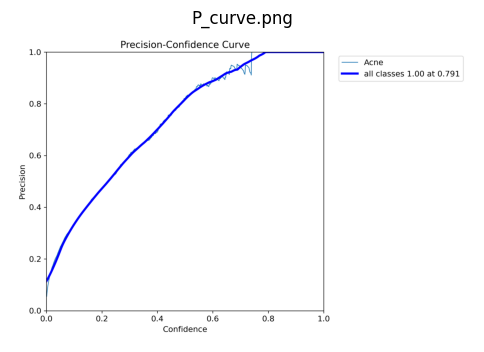

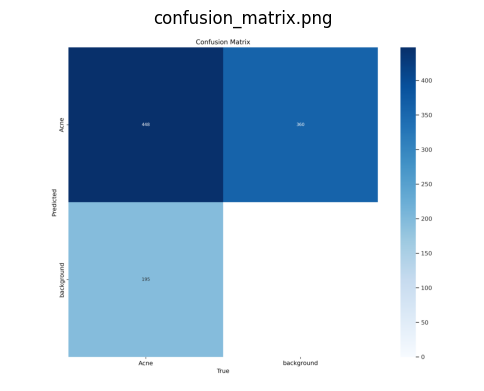

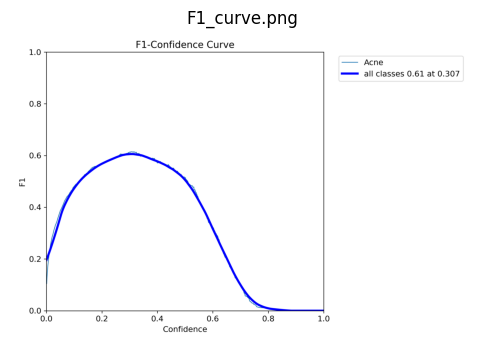

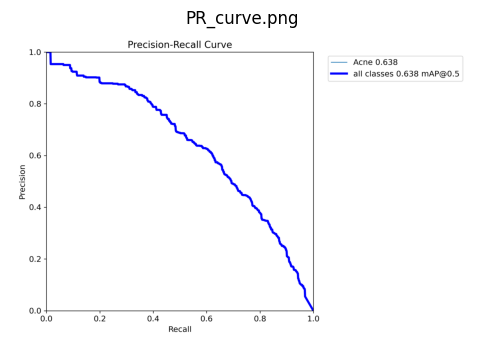

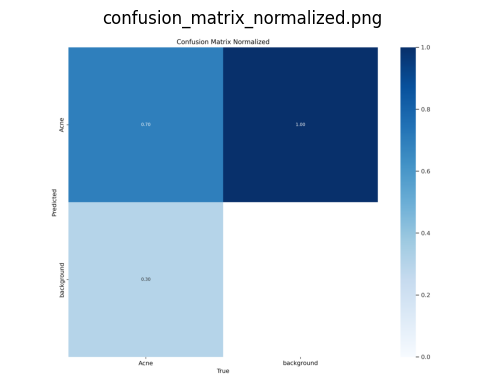

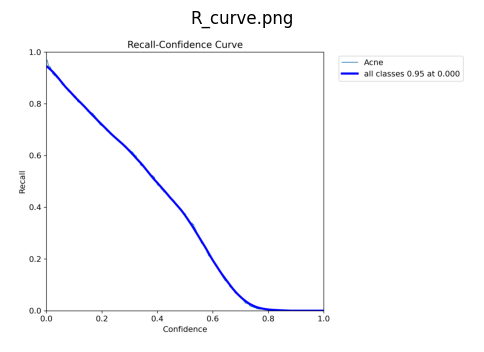

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

# Ambil semua file gambar evaluasi
image_paths = glob.glob('runs/detect/val14/*.png')

# Tampilkan semua gambar
for path in image_paths:
    img = mpimg.imread(path)
    plt.figure(figsize=(6, 5))
    plt.imshow(img)
    plt.title(path.split('/')[-1])
    plt.axis('off')
    plt.show()


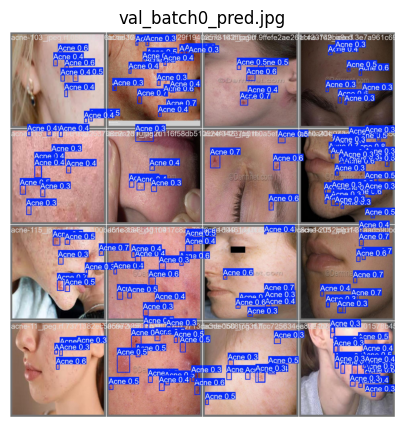

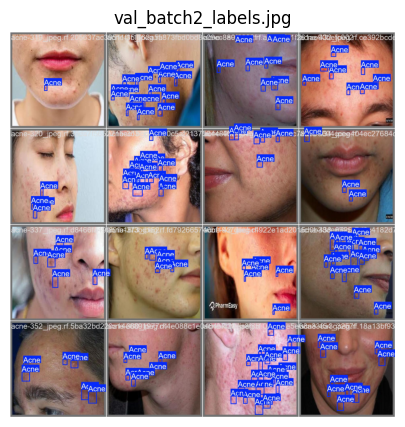

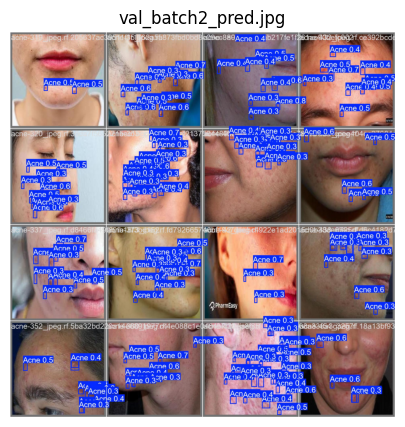

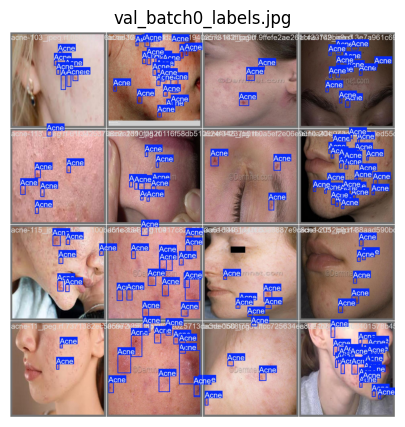

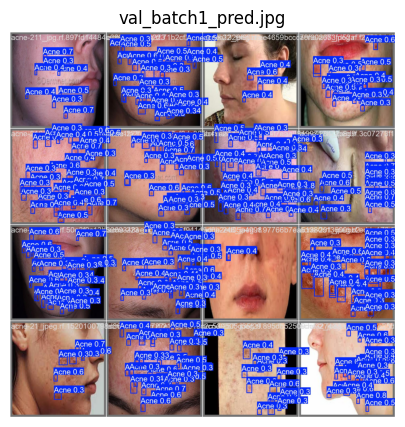

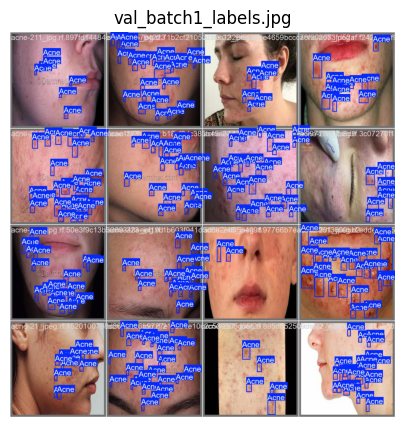

In [ ]:
# Ambil semua file gambar evaluasi
image_paths = glob.glob('runs/detect/val14/*.jpg')

# Tampilkan semua gambar
for path in image_paths:
    img = mpimg.imread(path)
    plt.figure(figsize=(6, 5))
    plt.imshow(img)
    plt.title(path.split('/')[-1])
    plt.axis('off')
    plt.show()

## Test Model

In [ ]:
from ultralytics import YOLO

# Load model hasil training
model = YOLO('/content/drive/MyDrive/AIOT/best.pt')
results = model.predict(source='/content/drive/MyDrive/AIOT/acne-dataset/test/images/acne-102_jpeg.rf.d15b34dc9a1e69aa996118a4c1a173ef.jpg', save=True, conf=0.3)


image 1/1 /content/drive/MyDrive/AIOT/acne-dataset/test/images/acne-102_jpeg.rf.d15b34dc9a1e69aa996118a4c1a173ef.jpg: 640x640 2 Acnes, 16.3ms
Speed: 2.1ms preprocess, 16.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
